# <font color = 'steelblue'> Does silencing the CG during test runs leads to performance deficits? (all runs)
    
### If the cingulate cortex (or CG) is necessary for rats to perform memory guided choices, then we predict that silencing this brain region should lead to performance deficits in a memory dependent task.
### We silenced CG at the same time as rats perform choices dependent upon previously acquired information, in order to test its necessity in this behavioral process.
### we will analyze the performance of control (nphr-, illumination will NOT lead to silencing) and experimental (nphr+, illumination will lead to silencing) rats under no illumination and illumination of the test run (during the expression of choice).
### We predict that if CG is causally involved in the processes leading to the expression of a memory dependent choice, that control animals should not present memory deficits upon illumination. However, we predict that experimental rats will indeed demonstrate a decreased performance upon illumination.


### <font color='firebrick'> Imports
***

In [16]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.lines as mlines
import matplotlib.patches as mpatches

from collect_and_organize_position_data_optogenetics import collect_and_organize_position_data
from file_lists import get_file_list

%matplotlib inline
%run data_prep_functions.ipynb

### <font color=firebrick> Inputs
***

In [17]:
path = "E:\POSITION DATA\PRE PROCESSED"

### <font color= 'seagreen'> Collect the pruned timestamped position and CP rois from all rats in the given path

In [18]:
data, rois = collect_pruned_position_and_cp_rois_all_rats_in_path(path)

In [25]:
first_row_runs = data.groupby(['session', 'run_nr']).head(1)

In [20]:
# Collect one row per run (in this case the first)
first_row_runs = first_row_runs.drop(['timestamp', 'x', 'y', 'x_diff'], axis=1).reset_index()

In [28]:
# Calculate performances for each rat, session and stimulation condition
first_row_test_runs = first_row_runs[first_row_runs['run_type'] == 'T']
perfs = first_row_runs.groupby(['group','rat','session', 'stim_condition']).apply(calc_performance_in_group)
perfs = perfs.reset_index().rename(columns={0:'performance'})
perfs

4485


,group,rat,session,stim_condition,performance
0,CTRL,CTRL2,2020-02-04T14_29_47,-1.0,85.714286
1,CTRL,CTRL2,2020-02-05T13_53_30,-1.0,88.888889
2,CTRL,CTRL2,2020-02-05T14_12_08,-1.0,63.636364
3,CTRL,CTRL2,2020-02-06T13_48_00,-1.0,75.000000
4,CTRL,CTRL2,2020-02-07T14_40_27,0.0,50.000000
...,...,...,...,...,...
551,NPHR,NPHR8,2020-12-07T15_25_21,1.0,100.000000
552,NPHR,NPHR8,2020-12-07T15_25_21,3.0,89.473684
553,NPHR,NPHR8,2020-12-08T13_06_15,0.0,100.000000
554,NPHR,NPHR8,2020-12-08T13_06_15,1.0,70.000000


# <font color='darkgreen'>1. Session performances distribution given stimulation condition per group

## <font color='seagreen'>1.1. With all data

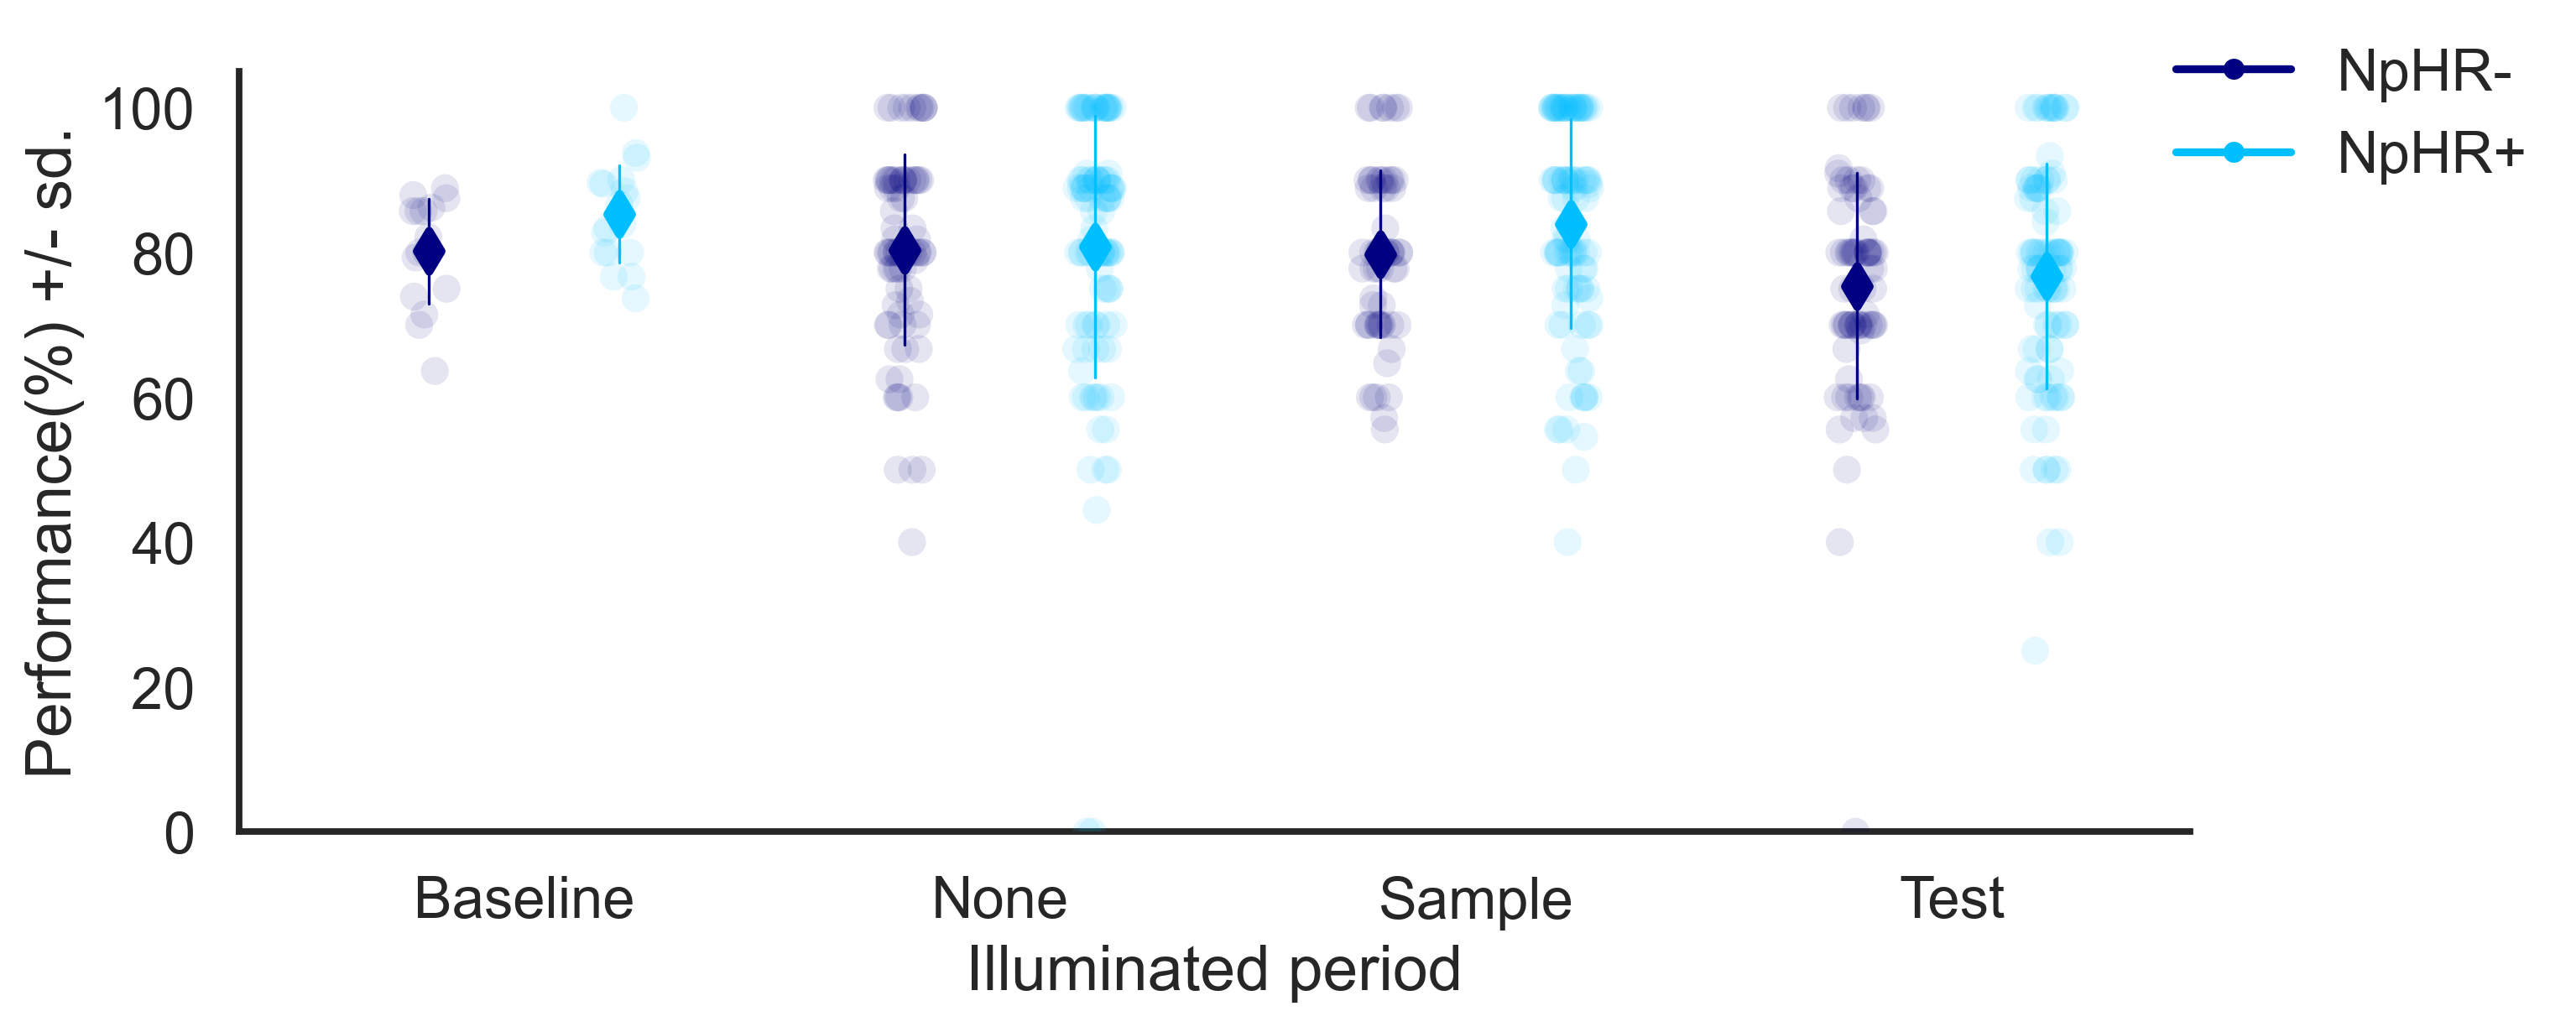

In [11]:
sns.set(style="white", context='talk')    
plt.figure(figsize=(10,4),dpi=300)

g = sns.stripplot(
    x='stim_condition', y='performance', hue='group',
    data=perfs,
    dodge=2, jitter=.08,
    alpha=.1, s=8,
    palette=['navy', 'deepskyblue']
)

# Show means
sns.pointplot(
    x='stim_condition', y='performance', hue='group',
    data=perfs,
    dodge=.4, 
    join=False,            
    markers="d", scale=.8, linewidth=2,
    ci="sd", 
    errwidth=.8,
    palette=['navy', 'deepskyblue']
)

g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Illuminated period',
    ylim=(0, 105), xlim=(-0.6, 3.5)
)

g.set_xticklabels(labels=['Baseline', 'None', 'Sample', 'Test'], rotation=0)

# ------------------------------------- LEGEND -------------------------------------------- 
g.legend_.remove()

control_line = mlines.Line2D([], [], color='navy', marker='o', markersize=5, label='NpHR-')
nphr_line = mlines.Line2D([], [], color='deepskyblue', marker='o', markersize=5, label='NpHR+')
plt.legend(handles=[control_line, nphr_line], frameon=False, loc='upper right', bbox_to_anchor=(1.2, 1.1))

sns.despine()
plt.show()

#### Some sessions (below) have a performance of zero. I checked these sessions and they are all small portions of larger sessions (for instance due to Bonsai crahes). Due to the low number of trials, it is easy for them to have performances of zero. 

In [29]:
perfs[perfs['performance']==0]

,group,rat,session,stim_condition,performance
194,CTRL,CTRL6,2020-11-16T15_34_22,3.0,0.0
298,NPHR,NPHR2,2019-10-08T14_51_19,0.0,0.0
499,NPHR,NPHR7,2020-10-27T10_07_46,0.0,0.0


#### The NpHR+ group shows some decreased performance values for the Test illuminated condition. However, I believe these values all come from the NPHR1 and NPHR2 rat, who experienced 4-5 Test illuminated trials per session. Given the low numbers per session, the presence of low performances per session is likely. I will repeat the analysis below, now removing the data from this rat in order to compare

## <font color='seagreen'>1.2. All data except NPHR1

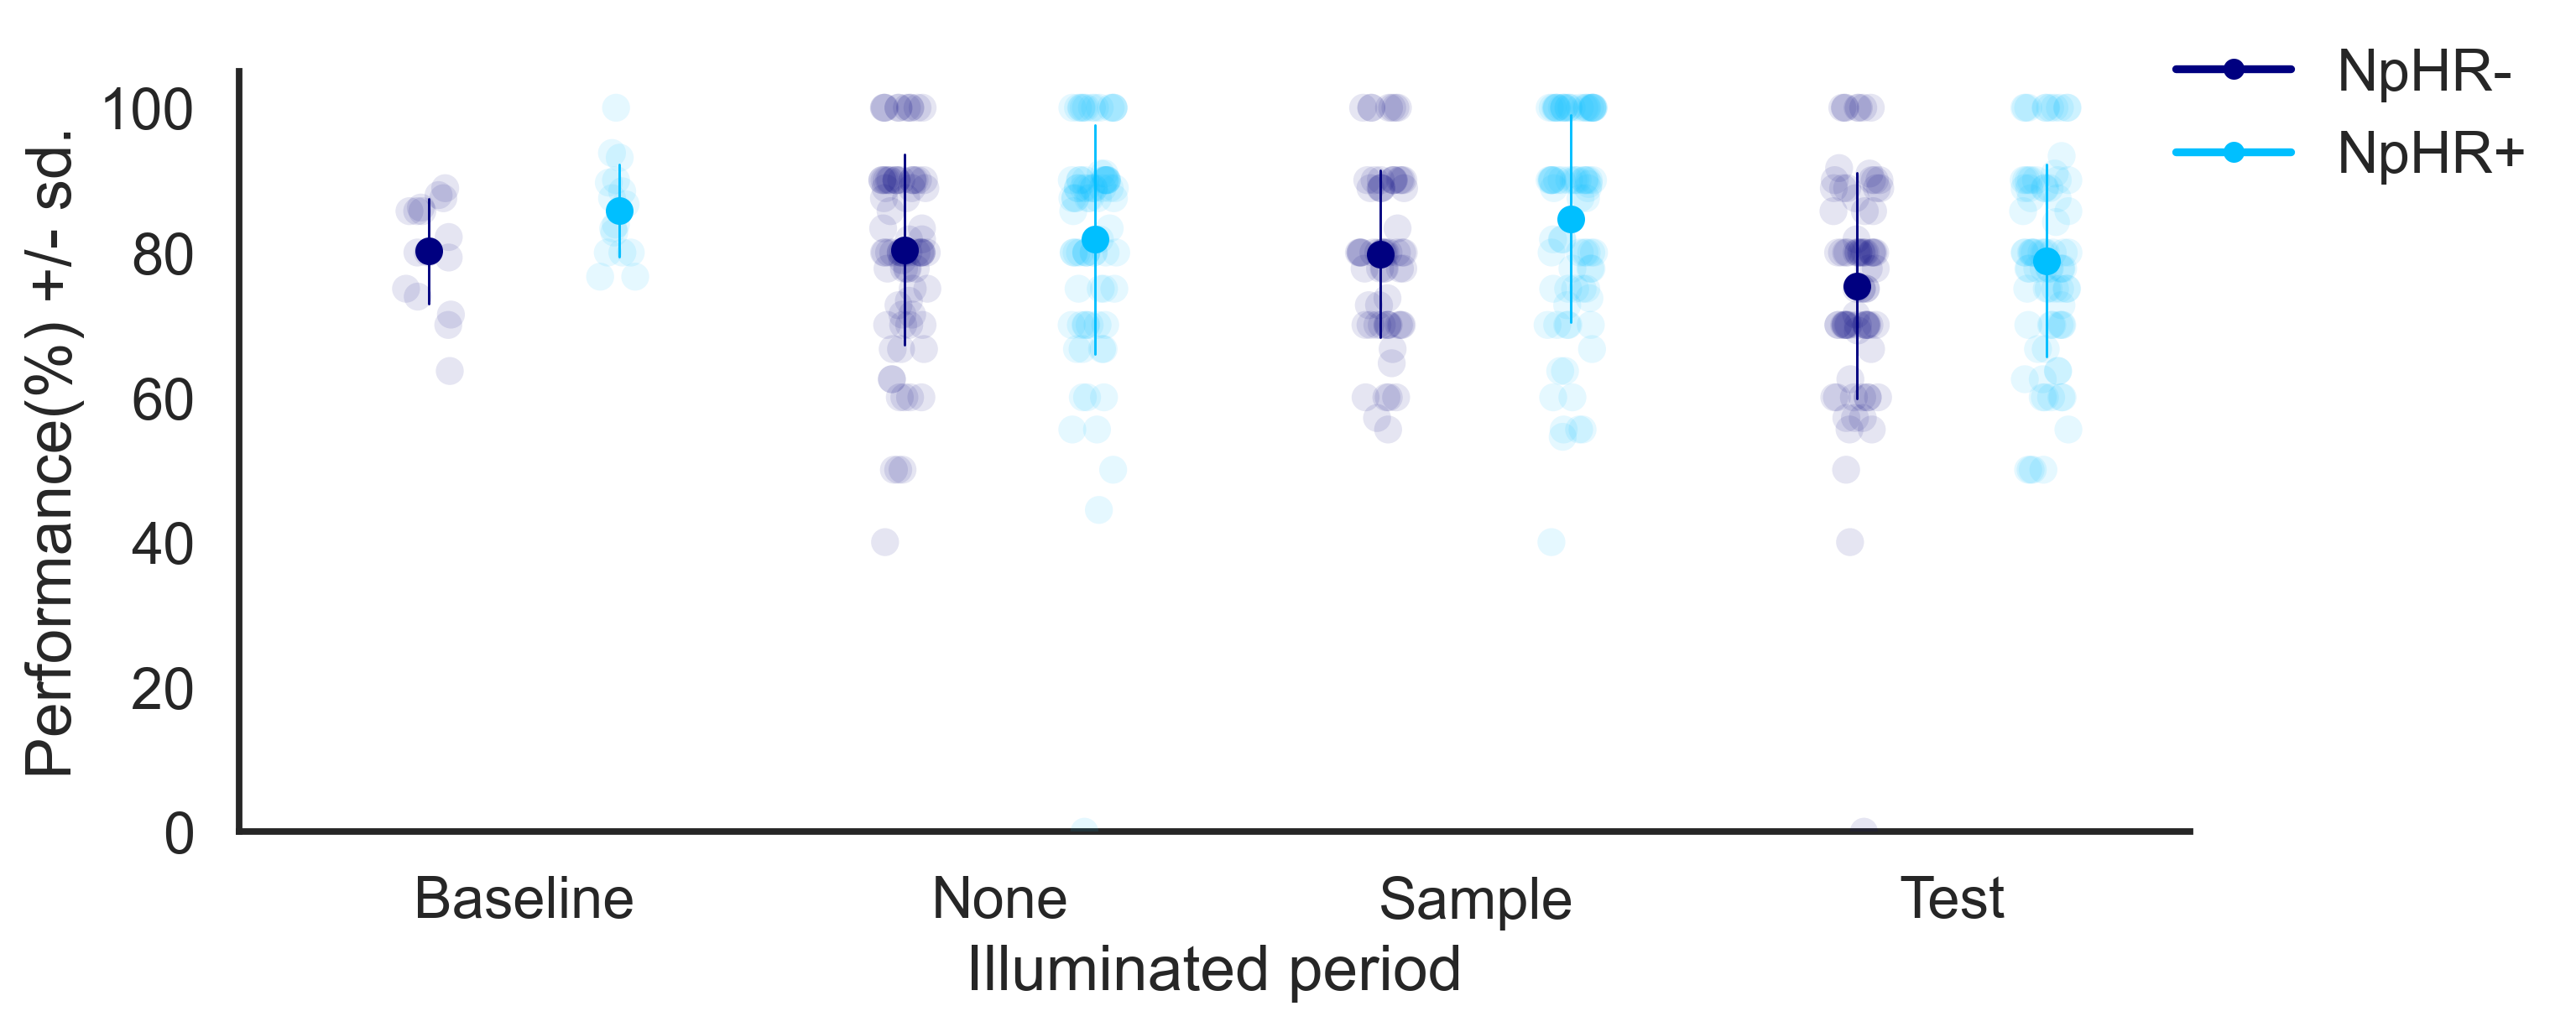

In [9]:
perfs_partial = perfs[(perfs['rat'] != 'NPHR1')&(perfs['rat'] != 'NPHR2')]

sns.set(style="white", context='talk')    
plt.figure(figsize=(10,4),dpi=300)

g = sns.stripplot(
    x='stim_condition', y='performance', hue='group',
    data=perfs_partial,
    dodge=3, jitter=1,
    alpha=.1, s=8,
    palette=['navy', 'deepskyblue']
)

# Show means
sns.pointplot(
    x='stim_condition', y='performance', hue='group',
    data=perfs_partial,
    dodge=.4, 
    join=False,            
    markers="o", scale=.6, linewidth=2,
    ci="sd",
    errwidth=.7,
    palette=['navy', 'deepskyblue']
)

g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Illuminated period',
    ylim=(0, 105), xlim=(-0.6, 3.5)
)

g.set_xticklabels(labels=['Baseline', 'None', 'Sample', 'Test'], rotation=0)

# ------------------------------------- LEGEND -------------------------------------------- 
g.legend_.remove()
control_line = mlines.Line2D([], [], color='navy', marker='o', markersize=5, label='NpHR-')
nphr_line = mlines.Line2D([], [], color='deepskyblue', marker='o', markersize=5, label='NpHR+')
plt.legend(handles=[control_line, nphr_line], frameon=False, loc='upper right', bbox_to_anchor=(1.2, 1.1))

sns.despine()
plt.show()

#### It is now confirmed that the lower performance values were mostly collected from the first two NPHR+ rats of the protocol, who experienced a lower nubmer of trials per session

# <font color='darkgreen'> 2. Combined performance per rat distribution given stimulation condition and group
***
   #### Calculation of the overall performance for each rat given the stimulation condition and the experimental group
   #### To compare the performance levels of each experimental group in each stimulation condition, across the protocol
***

## <font color='seagreen'> 2.1. Overall view of the pooled performances per rat for each experimental group given the stimulation condition 

In [23]:
pooled_perfs = perfs.groupby(['group', 'rat', 'stim_condition'])['performance'].mean().reset_index()

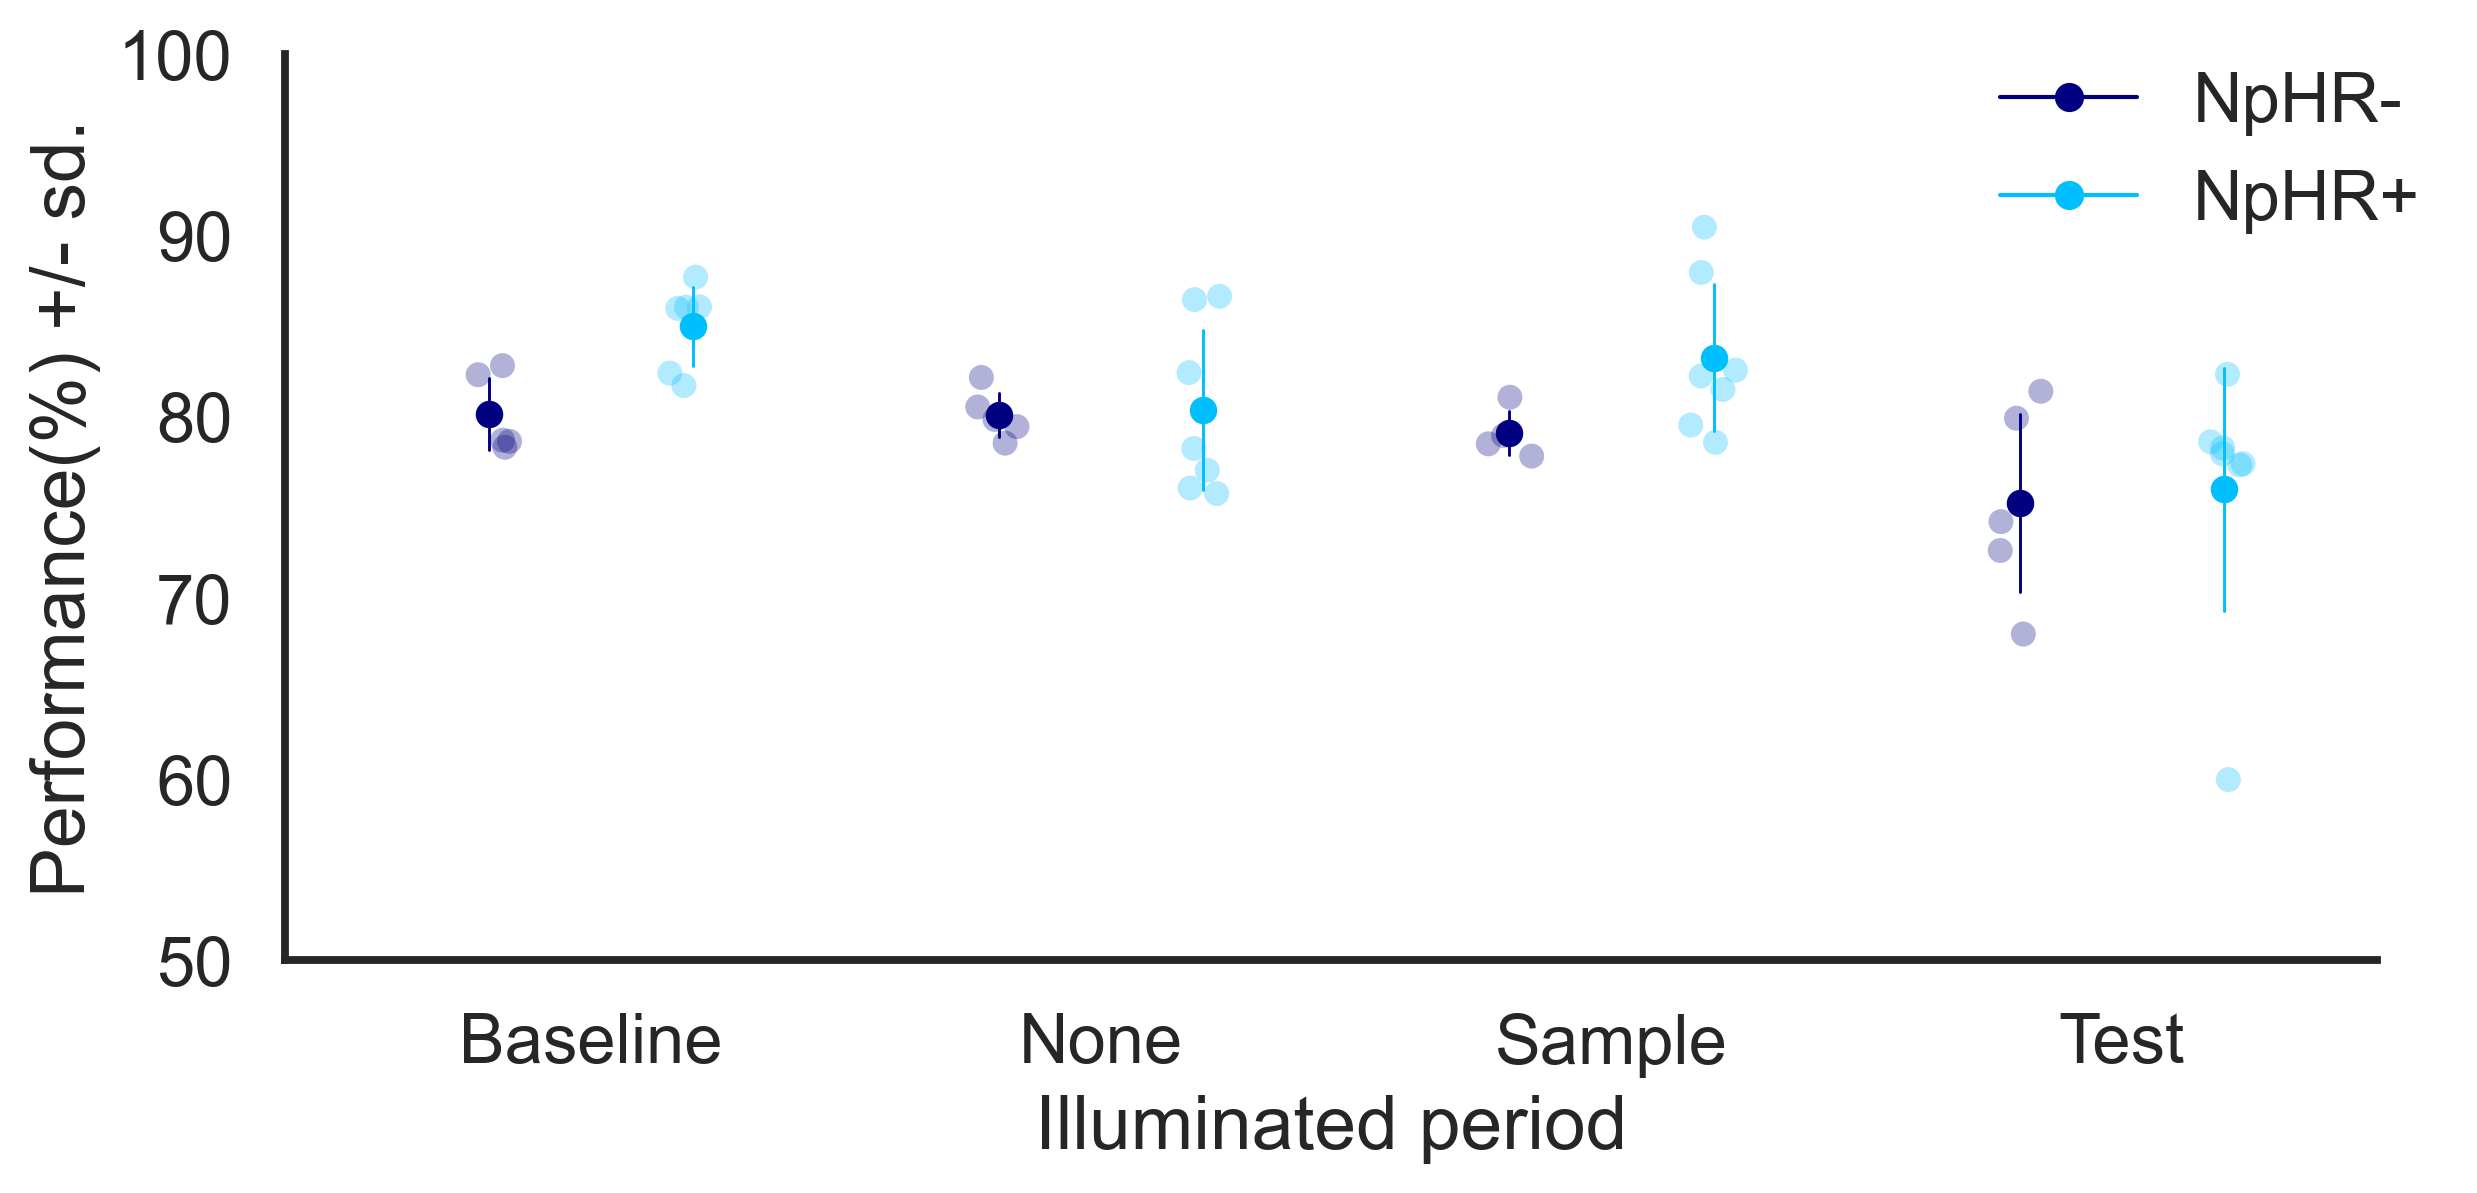

In [24]:
sns.set(style="white", context='talk')    
plt.figure(figsize=(9,4),dpi=300)

g = sns.stripplot(
    x='stim_condition', y='performance', hue='group',
    data=pooled_perfs,
    dodge=2, jitter=.09,
    alpha=.3, s=6,
    palette=['navy', 'deepskyblue']
)

# Show means
sns.pointplot(
    x='stim_condition', y='performance', hue='group',
    data=pooled_perfs,
    dodge=.4, 
    join=False,            
    markers="o", scale=.5, linewidth=1.5,
    ci="sd",
    errwidth=.7,
    palette=['navy', 'deepskyblue']
)

g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Illuminated period',
    ylim=(50, 100), xlim=(-0.6, 3.5)
)

g.set_xticklabels(labels=['Baseline', 'None', 'Sample', 'Test'], rotation=0)

# ------------------------------------- LEGEND -------------------------------------------- 
g.legend_.remove()

control_line = mlines.Line2D([], [], color='navy', marker='o', markersize=6, linewidth=1, label='NpHR-')
nphr_line = mlines.Line2D([], [], color='deepskyblue', marker='o', markersize=6, linewidth=1, label='NpHR+')
plt.legend(handles=[control_line, nphr_line], frameon=False, loc='upper right', bbox_to_anchor=(1.05, 1.05))

sns.despine()
plt.show()

## <font color='seagreen'>2.2. No stimulation vs. Test stimulation pooled performance (alone)

In [14]:
mask = (pooled_perfs['stim_condition']==0) | (pooled_perfs['stim_condition'] == 3)
pooled_no_vs_test_perfs = pooled_perfs[mask]

In [15]:
sns.set(style="white", context='talk')    
plt.figure(figsize=(9,4),dpi=300)

pooled_no_vs_test_perfs['stim_condition'] = pooled_pre_vs_no_vs_test_perfs['stim_condition'].mask(
    pooled_no_vs_test_perfs['stim_condition'] == 3, 1
)

g = sns.relplot(
    data=pooled_no_vs_test_perfs, col='group', height=5,
    x='stim_condition', y='performance', hue='rat', kind='line',
    linewidth=1, marker='o')

g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Illuminated period',
    ylim=(50, 100), xlim=(-0.2, 1.2), xticks=[0,1],
    xticklabels=['None', 'Test']
)

NameError: name 'pooled_pre_vs_no_vs_test_perfs' is not defined

<Figure size 2700x1200 with 0 Axes>

## <font color='seagreen'> 2.2. No stimulation vs. Sample stimulation pooled performance (alone)

In [26]:
mask = (pooled_perfs['stim_condition'].between(0,1))
pooled_no_vs_sample_perfs =pooled_perfs[mask]

<Figure size 2700x1200 with 0 Axes>

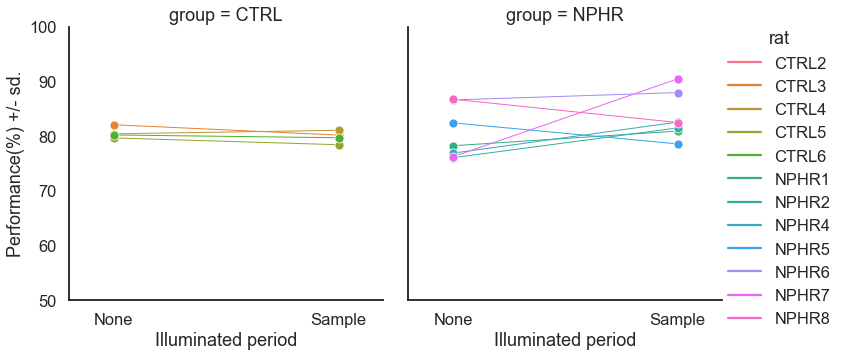

In [27]:
sns.set(style="white", context='talk')    
plt.figure(figsize=(9,4),dpi=300)
g = sns.relplot(
    data=pooled_no_vs_sample_perfs, col='group', height=5,
    x='stim_condition', y='performance', hue='rat', kind='line',
    linewidth=1, marker='o')

g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Illuminated period',
    ylim=(50, 100), xlim=(-0.2, 1.2), xticks=[0,1],
    xticklabels=['None', 'Sample']
)

___

# <font color='darkgreen'> 3. Performance given experience and stimulation condition
___     
### _Does the performance varies with experience for each condition?_
### _Do rats become more proeficient over time?_
    
##### Calculation of the performance given N trials for each stimulation condition. It will be used to plot the performance given experience, across the protocol    

In [30]:
# Add info regarding the number of experience trial per condition
first_row_test_runs  = first_row_test_runs.groupby(['rat', 'stim_condition']).apply(add_condition_trial_nr)


## <font color='seagreen'> 3.1 Performance given experience (N=50) within groups and conditions


In [31]:
# Calculate performance per condition at any given N trials

grouped = first_row_test_runs.groupby(['group','rat', 'stim_condition'])
group_list = []

N = 50

for group in grouped.groups:
    
    par_perf_group = calculate_performance_given_ntrials(grouped, group, N)
    
    try:
        group_list.append(par_perf_group)
    except:
        group_list = par_perf_group
        
par_perf = pd.concat(group_list)
par_perf = par_perf.rename(columns={'outcome': 'perf'}).reset_index()

In [32]:
# Remove one data point from NPHR1 (accidently has a 1 index)
i = par_perf[(par_perf['rat'] == 'NPHR1') & (par_perf['index']==1)].index
par_perf = par_perf.drop(index=i)

# Remove data with index above 2
par_perf = par_perf[par_perf['index'].between(0,2)]


### <font color='seagreen'> 3.1.1 Performance given experience (N=50) in the NpHR+ group - comparing conditions


['NPHR1' 'NPHR2' 'NPHR4' 'NPHR5' 'NPHR6' 'NPHR7' 'NPHR8']


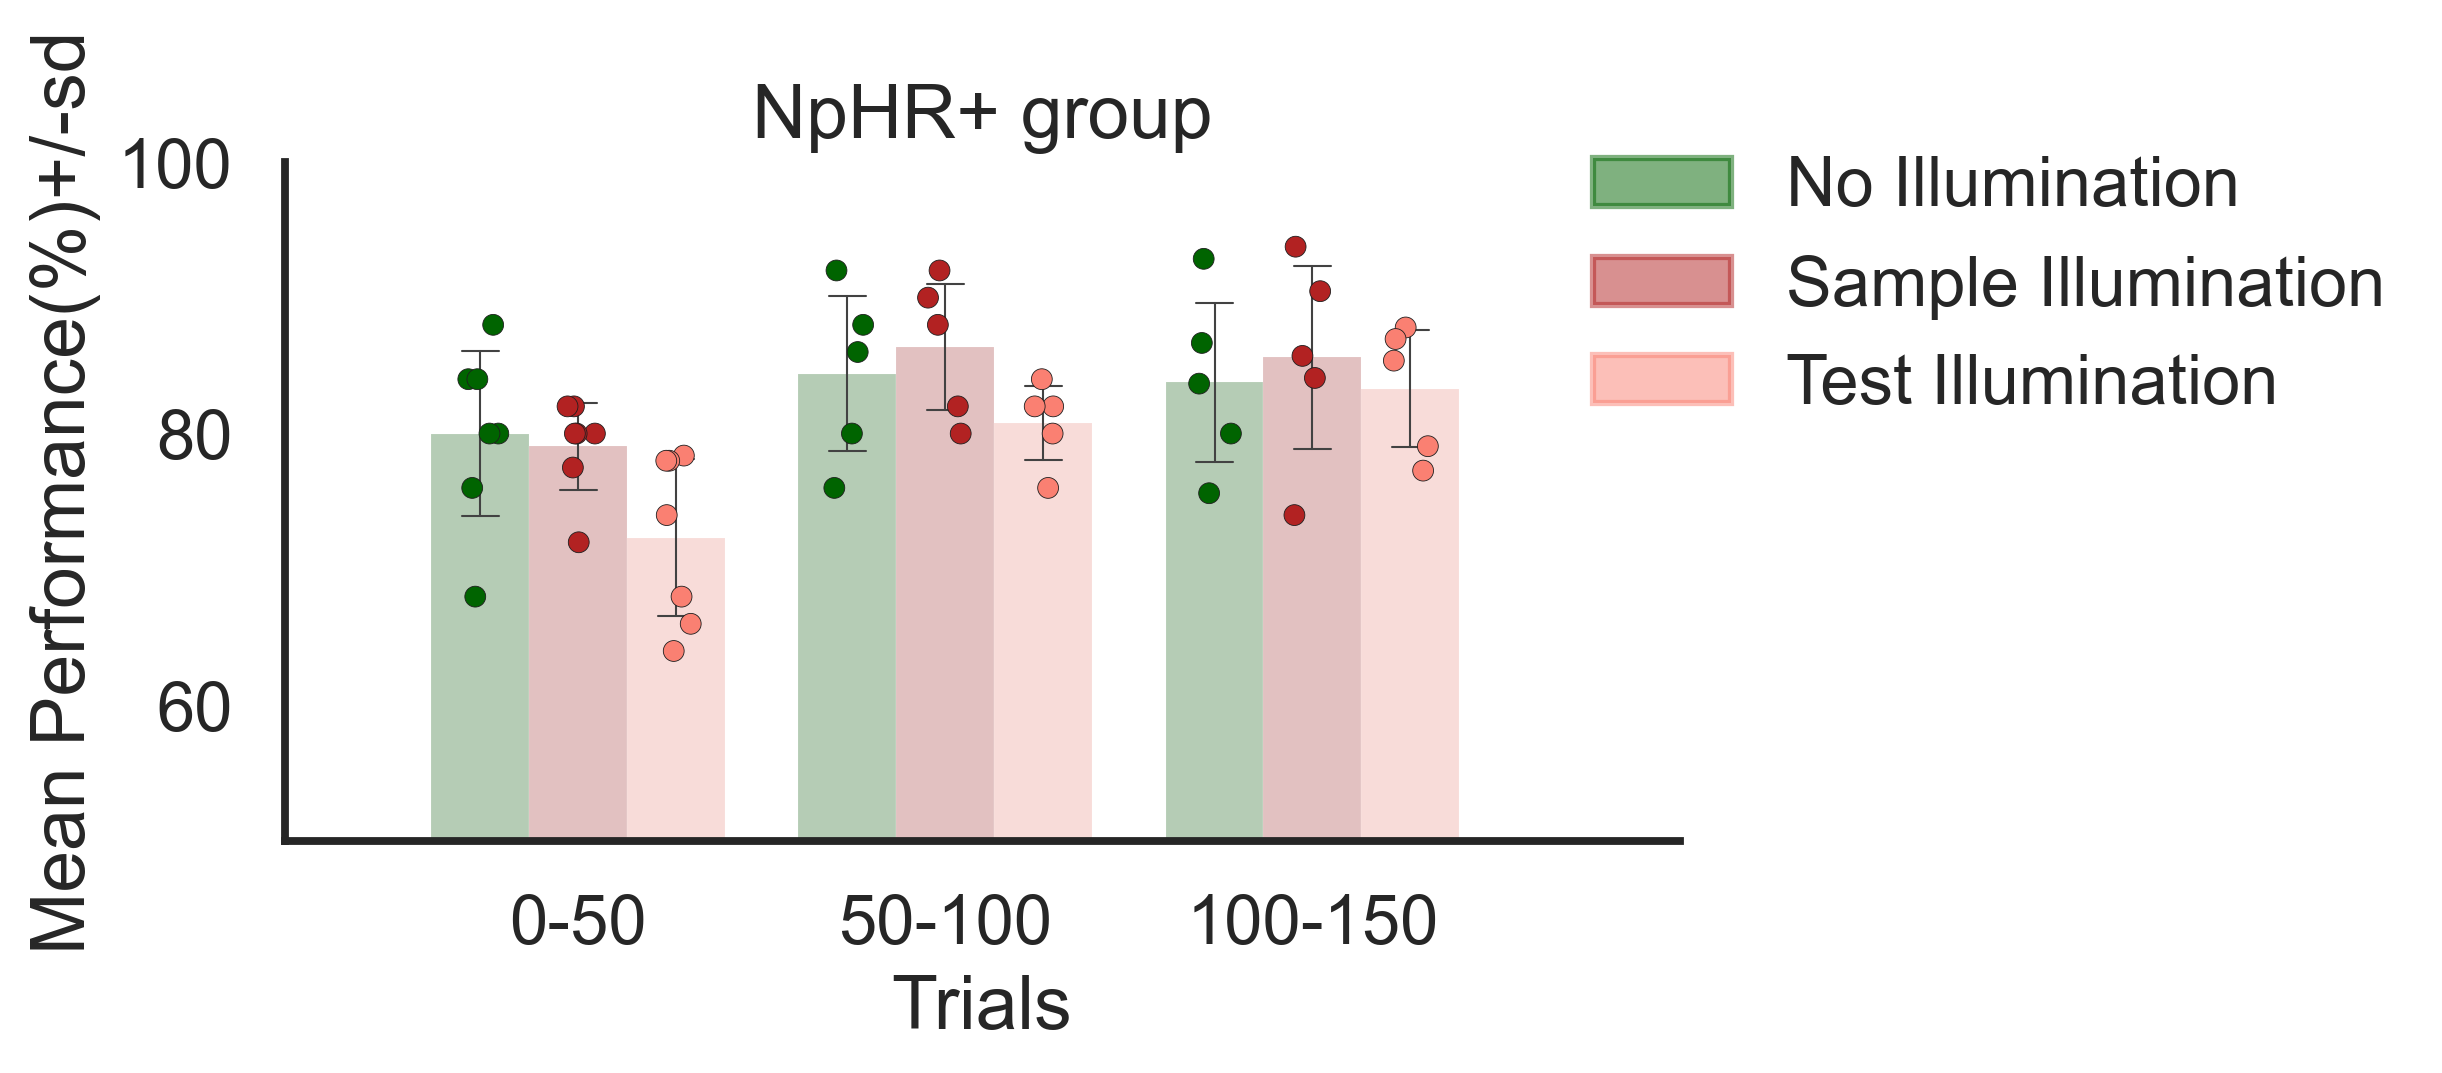

In [33]:
df = par_perf[par_perf['group'] == 'NPHR']
df = df[df['stim']>=0]

print(df['rat'].unique())

sns.set(style="white", context='talk')
plt.figure(figsize=(6,3), dpi=300)

g = sns.stripplot(
    data=df, x='index', y='perf', hue='stim',
    jitter=.15, alpha=1, s=5, dodge=True, linewidth=.2,
    palette=['darkgreen', 'firebrick', 'salmon']
)
    
# Show means. 1st color=0, 2nd color=sample, 3rd color=test
sns.barplot(
    data=df, x='index', y='perf', hue='stim', 
    alpha=.3, ci='sd', errwidth=.5, capsize=.1, linewidth=.1,
    palette=['darkgreen', 'firebrick', 'salmon']
)

g.set(
    xlim=(-.8,3), ylim=(50,100),
    ylabel=' Mean Performance(%)+/-sd', xlabel='Trials',
    title='NpHR+ group'
)

g.set_xticklabels(['0-50', '50-100', '100-150'], rotation=0)
g.legend_.remove()

no_patch = mpatches.Patch(color='darkgreen', label='No Illumination', alpha=.5)
sample_patch = mpatches.Patch(color='firebrick', label='Sample Illumination', alpha=.5)
test_patch = mpatches.Patch(color='salmon', label='Test Illumination', alpha=.5)

plt.legend(handles=[no_patch, sample_patch, test_patch], frameon=False, loc='upper right', bbox_to_anchor=(1.55, 1.1))
sns.despine()
plt.show()

***
### <font color='seagreen'> 3.1.2 Performance given experience (N=50) in the NpHR- group - comparing conditions
***

['CTRL2' 'CTRL3' 'CTRL4' 'CTRL5' 'CTRL6']


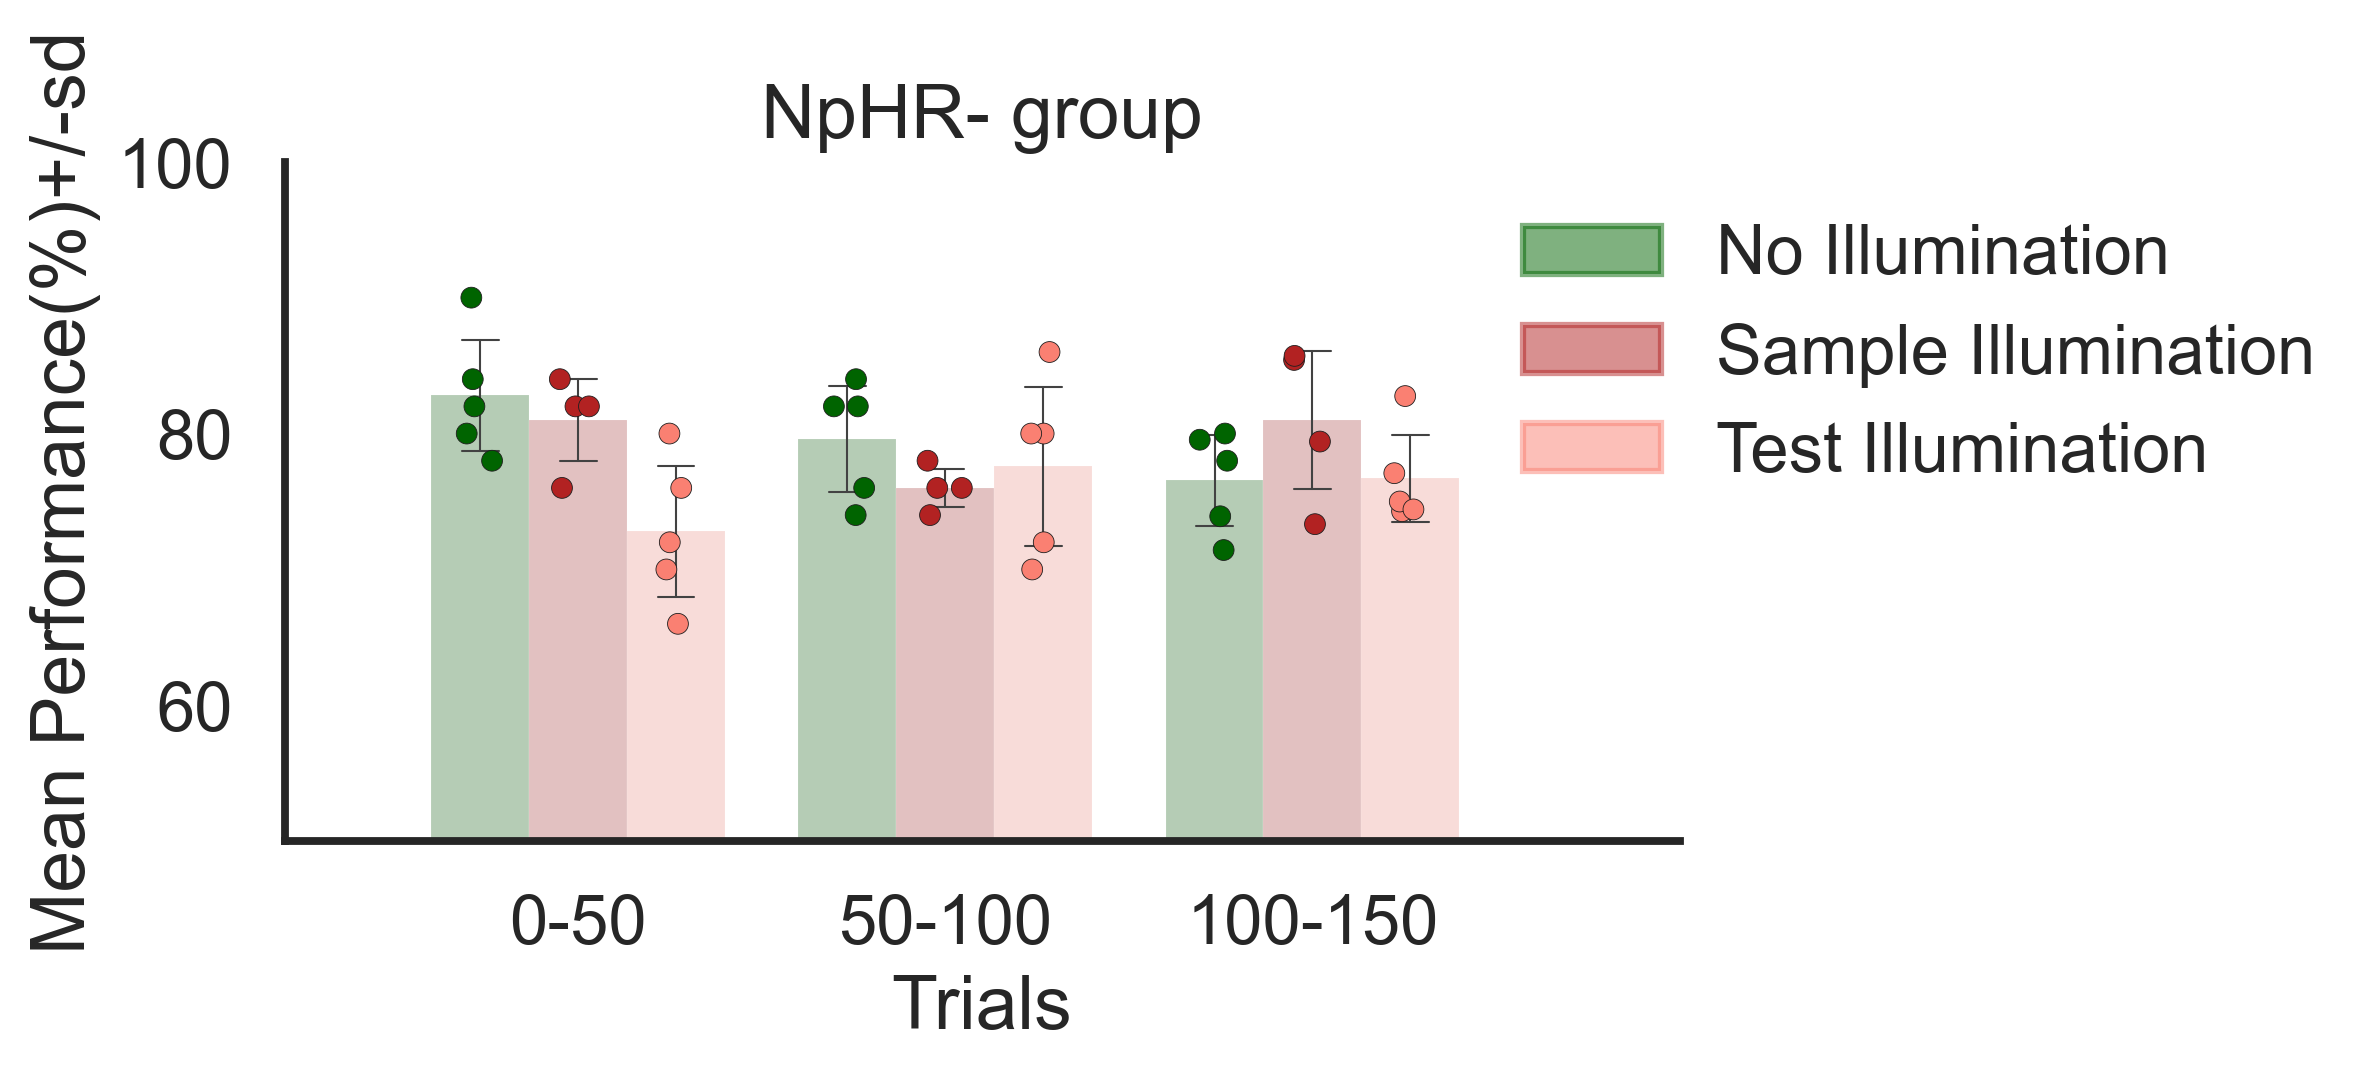

In [34]:
df = par_perf[par_perf['group'] == 'CTRL']#.drop(index=[3])
df = df[df['stim']>=0]
print(df['rat'].unique())

sns.set(style="white", context='talk')
plt.figure(figsize=(6,3), dpi=300)

g = sns.stripplot(
    data=df, x='index', y='perf', hue='stim',
    jitter=.15, alpha=1, s=5, dodge=True, linewidth=.2,
    palette=['darkgreen', 'firebrick', 'salmon']
)
    
# Show means. 1st color=0, 2nd color=sample, 3rd color=test
sns.barplot(
    data=df, x='index', y='perf', hue='stim', 
    alpha=.3, ci='sd', errwidth=.5, capsize=.1, linewidth=.1,
    palette=['darkgreen', 'firebrick', 'salmon']
)

g.set(
    xlim=(-.8,3), ylim=(50,100),
    ylabel=' Mean Performance(%)+/-sd', xlabel='Trials',
    title='NpHR- group'
)

g.set_xticklabels(['0-50', '50-100', '100-150'], rotation=0)
g.legend_.remove()

plt.legend(handles=[no_patch, sample_patch, test_patch], frameon=False, loc='upper right', bbox_to_anchor=(1.5, 1))
sns.despine()
plt.show()


***
### <font color='seagreen'> 3.1.3 Performance given experience (N=50) for test illuminated trials - comparing groups
***

['CTRL2' 'CTRL3' 'CTRL4' 'CTRL5' 'CTRL6' 'NPHR1' 'NPHR2' 'NPHR4' 'NPHR5'
 'NPHR6' 'NPHR7' 'NPHR8']


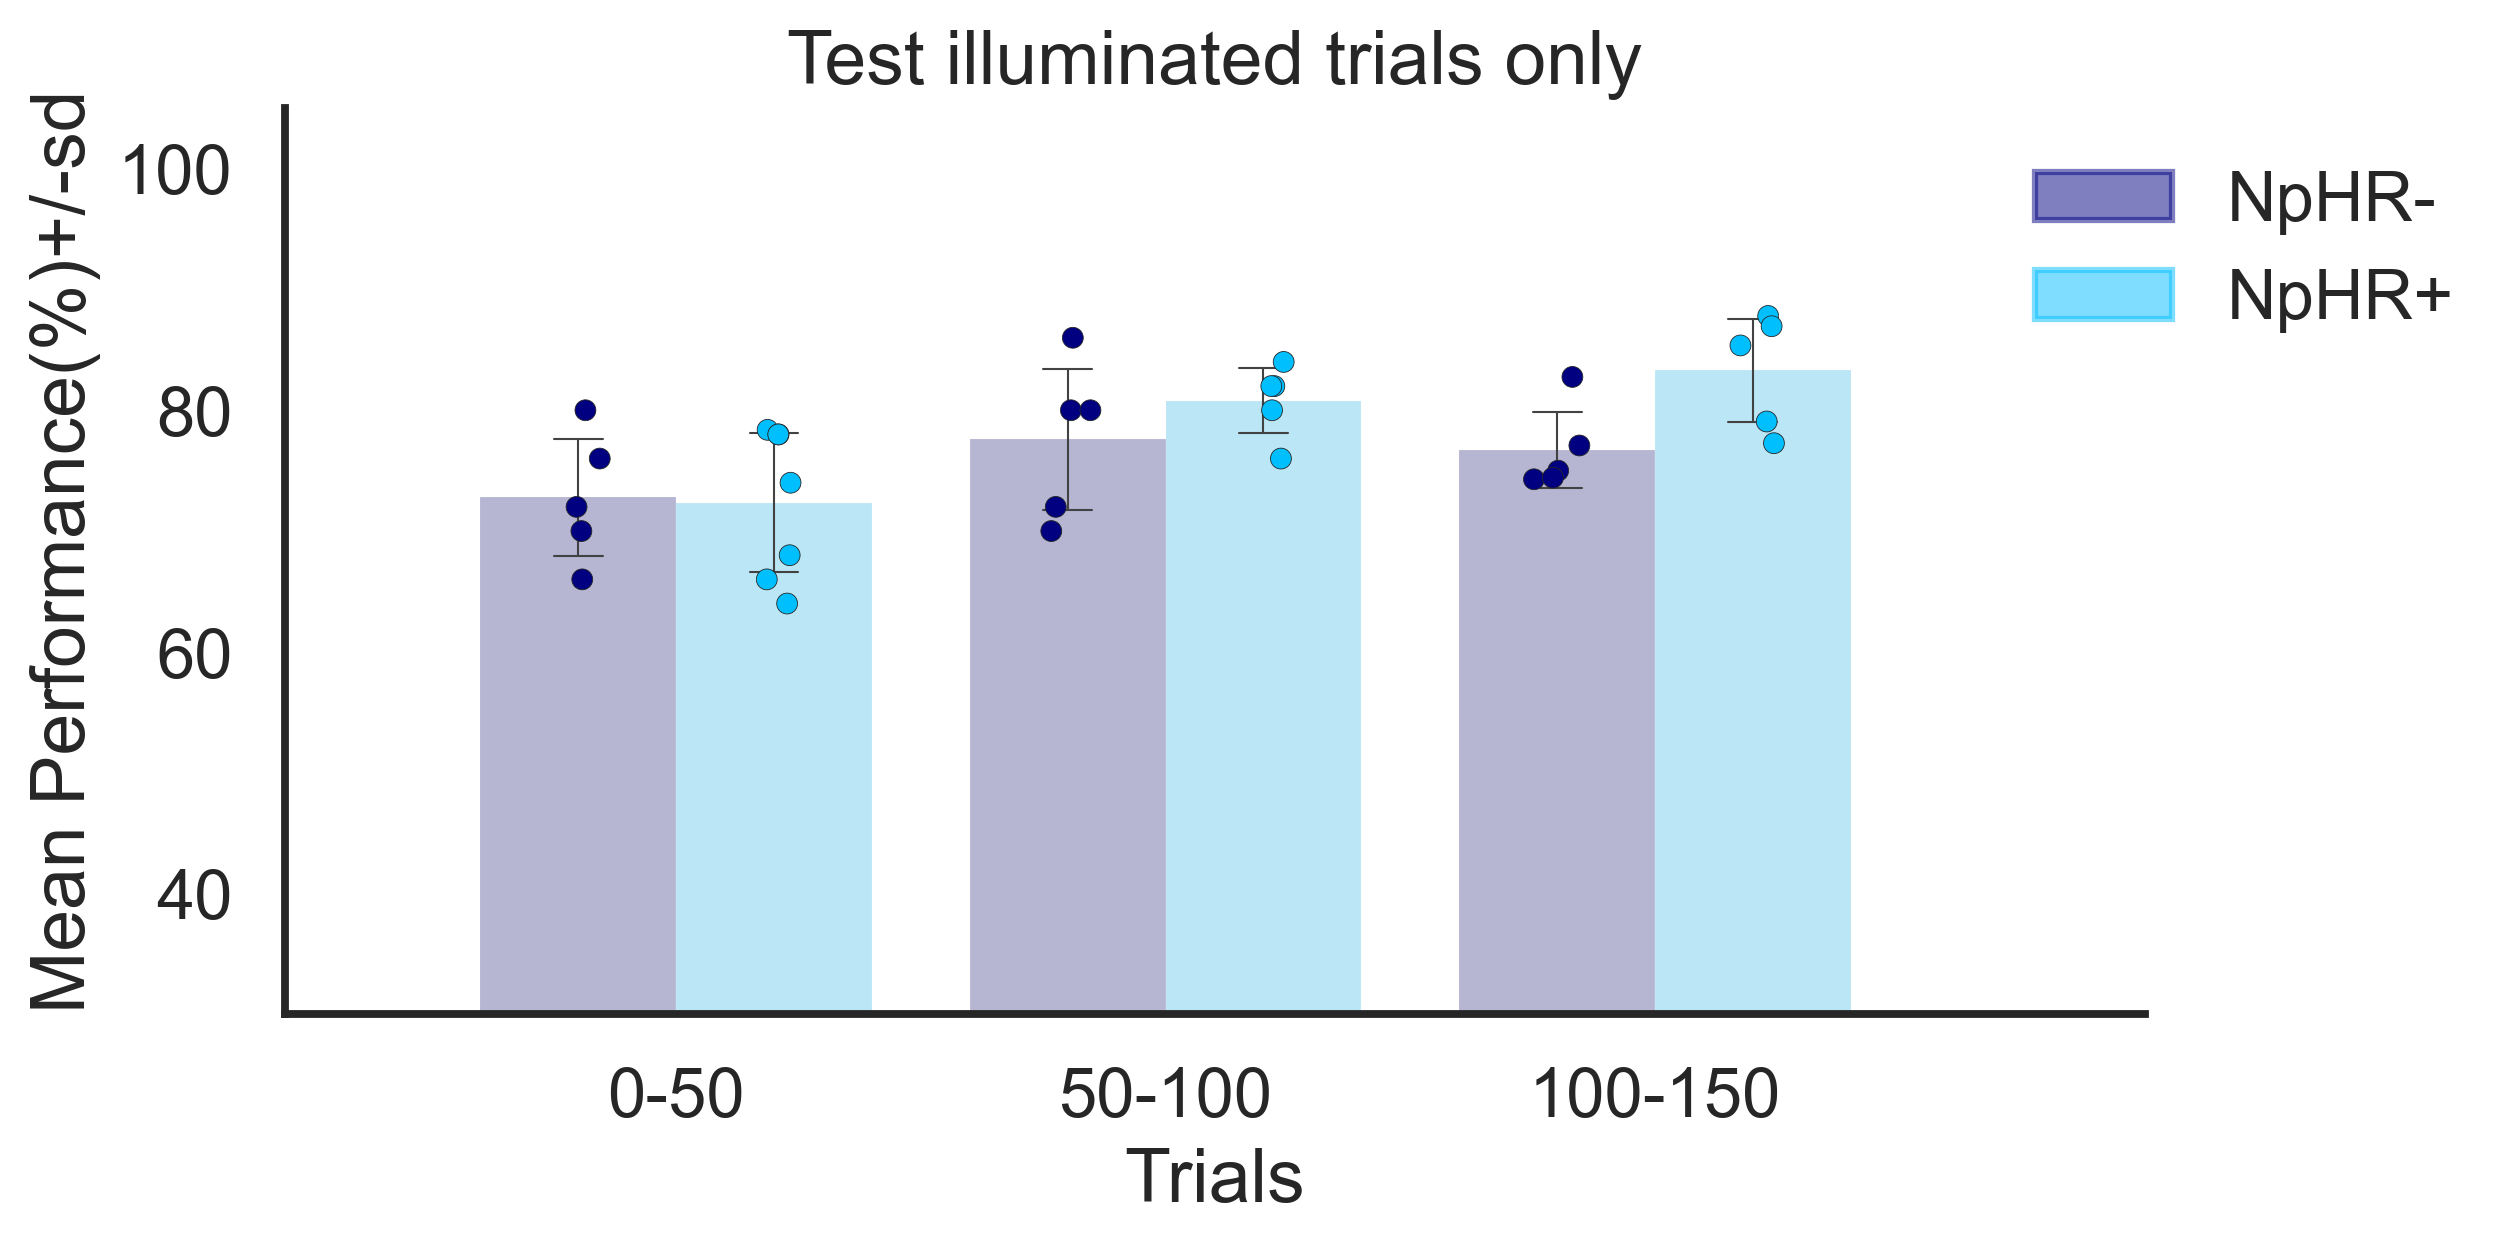

In [35]:
# Collect trials with the test run illuminated
df = par_perf[par_perf['stim'] == 3].reset_index()#.drop(index=[3])
print(df['rat'].unique())

sns.set(style="white", context='talk')
plt.figure(figsize=(8,4), dpi=300)

g = sns.stripplot(
    data=df, x='index', y='perf', hue='group',
    jitter=.1, alpha=1, s=5, dodge=True, linewidth=.2,
    palette=['navy', 'deepskyblue']
)
    
# Show means. 1st color=0, 2nd color=sample, 3rd color=test
sns.barplot(
    data=df, x='index', y='perf', hue='group', 
    alpha=.3, ci='sd', errwidth=.5, capsize=.1, linewidth=.1,
    palette=['navy', 'deepskyblue']
)

g.set(
    xlim=(-.8,3), ylim=(30,105),
    ylabel=' Mean Performance(%)+/-sd', xlabel='Trials',
    title='Test illuminated trials only'
)

g.set_xticklabels(['0-50', '50-100', '100-150'], rotation=0)
g.legend_.remove()

ctrl_patch = mpatches.Patch(color='navy', label='NpHR-', alpha=.5)
nphr_patch = mpatches.Patch(color='deepskyblue', label='NpHR+', alpha=.5)

plt.legend(handles=[ctrl_patch, nphr_patch], frameon=False, loc='upper right', bbox_to_anchor=(1.2, 1))

sns.despine()
plt.show()


***
### <font color='seagreen'> 3.1.4 Performance given experience (N=50) for sample illuminated trials - comparing groups
***

['CTRL3' 'CTRL4' 'CTRL5' 'CTRL6' 'NPHR1' 'NPHR2' 'NPHR4' 'NPHR5' 'NPHR6'
 'NPHR7' 'NPHR8']


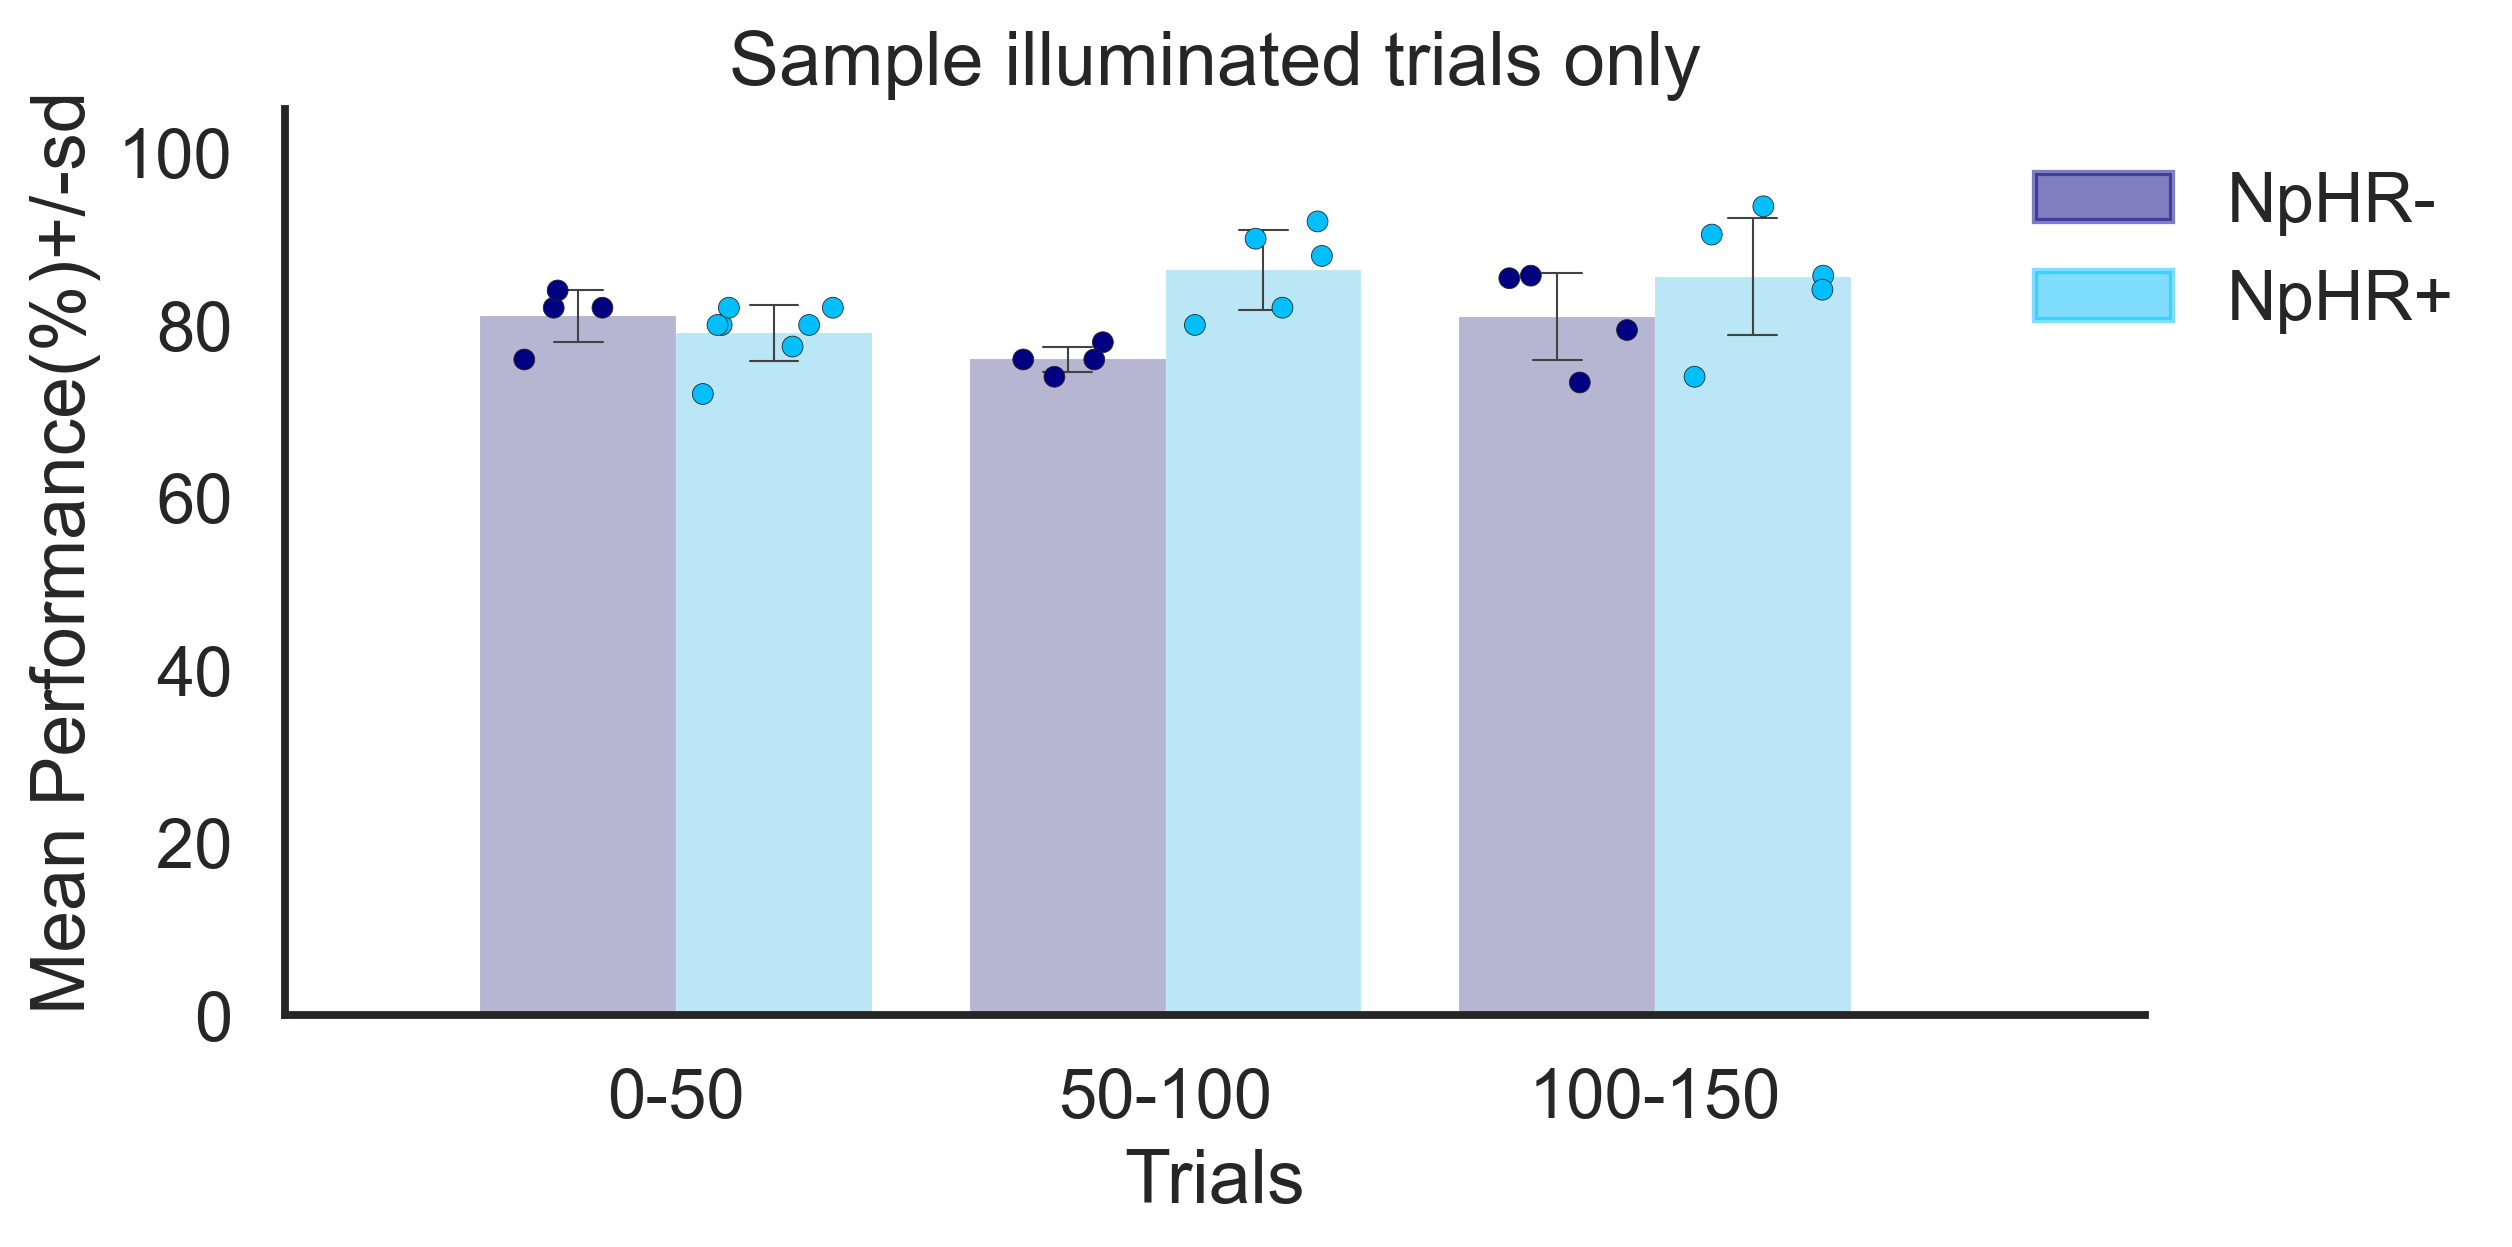

In [36]:
df = par_perf[par_perf['stim'] == 1]
print(df['rat'].unique())
sns.set(style="white", context='talk')
plt.figure(figsize=(8,4), dpi=300)
g = sns.stripplot(
    data=df, x='index', y='perf', hue='group',
    jitter=.3, alpha=1, s=5, dodge=True, linewidth=.2,
    palette=['navy', 'deepskyblue']
)    
# Show means. 1st color=0, 2nd color=sample, 3rd color=test
sns.barplot(
    data=df, x='index', y='perf', hue='group', 
    alpha=.3, ci='sd', errwidth=.5, capsize=.1, linewidth=.1,
    palette=['navy', 'deepskyblue']
)
g.set(
    xlim=(-.8,3), ylim=(0,105),
    ylabel=' Mean Performance(%)+/-sd', xlabel='Trials',
    title='Sample illuminated trials only'
)
g.set_xticklabels(['0-50', '50-100', '100-150'], rotation=0)
g.legend_.remove()
plt.legend(handles=[ctrl_patch, nphr_patch], frameon=False, loc='upper right', bbox_to_anchor=(1.2, 1))

sns.despine()
plt.show()


***
### <font color='seagreen'> 3.1.5 Performance given experience (N=50) for non-illuminated trials - comparing groups
***

In [37]:
# Collect only non-illuminated trials
df = par_perf[par_perf['stim'] == 0]
print(df['rat'].unique())

['CTRL2' 'CTRL3' 'CTRL4' 'CTRL5' 'CTRL6' 'NPHR1' 'NPHR2' 'NPHR4' 'NPHR5'
 'NPHR6' 'NPHR7' 'NPHR8']


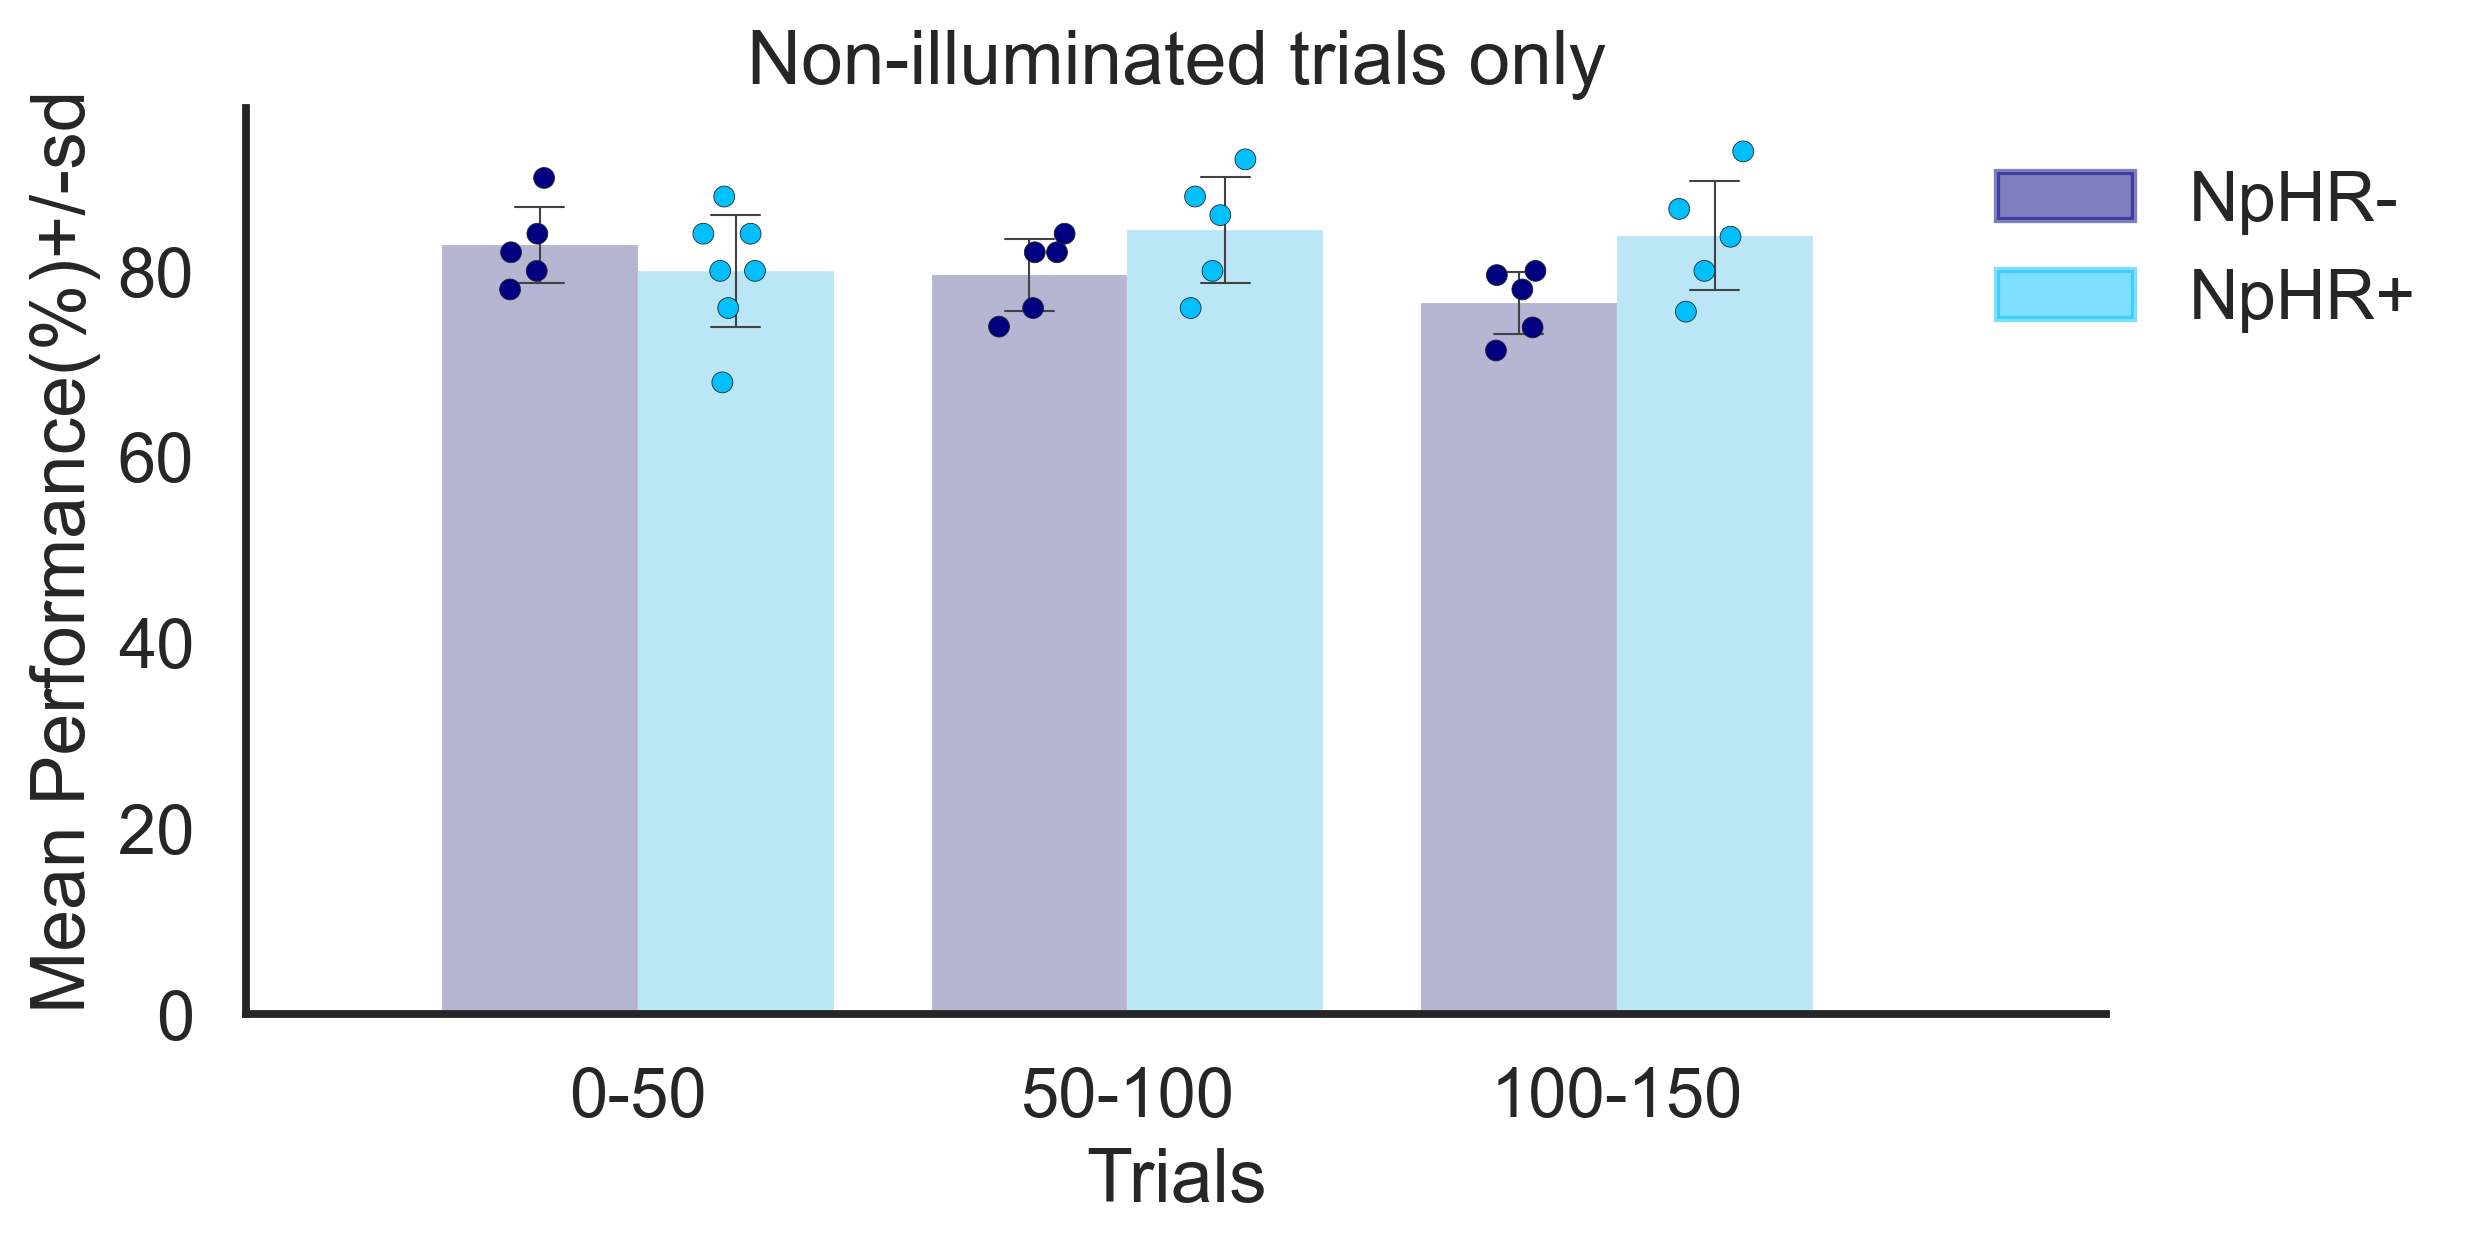

In [38]:
sns.set(style="white", context='talk')
plt.figure(figsize=(8,4), dpi=300)

# Show means. 1st color=0, 2nd color=sample, 3rd color=test
sns.barplot(
    data=df, x='index', y='perf', hue='group', 
    alpha=.3, ci='sd', errwidth=.5, capsize=.1, linewidth=.1,
    palette=['navy', 'deepskyblue']
)
g = sns.stripplot(
    data=df, x='index', y='perf', hue='group',
    jitter=.15, alpha=1, s=5, dodge=True, linewidth=.2,
    palette=['navy', 'deepskyblue']
)
g.set(
    xlim=(-.8,3), #ylim=(50,100),
    ylabel=' Mean Performance(%)+/-sd', xlabel='Trials',
    title='Non-illuminated trials only'
)

g.set_xticklabels(['0-50', '50-100', '100-150'], rotation=0)
g.legend_.remove()
plt.legend(handles=[ctrl_patch, nphr_patch], frameon=False, loc='upper right', bbox_to_anchor=(1.2, 1))

sns.despine()
plt.show()

### <font color='seagreen'> 3.1.5 Performance in the first 10 trials

In [42]:
# Calculate performance per condition at any given N trials
grouped = first_row_test_runs.groupby(['group','rat', 'stim_condition'])
group_list = []

N = 10
for group in grouped.groups:
    
    par_perf_group = calculate_performance_given_ntrials(grouped, group, N)
    
    try:
        group_list.append(par_perf_group)
    except:
        group_list = par_perf_group
        
par_perf = pd.concat(group_list)
par_perf = par_perf.rename(columns={'outcome': 'perf'}).reset_index()

In [43]:
# Keep only first index
par_perf = par_perf[(par_perf['index'] == 0) & (par_perf['stim'].between(0,3))]

['CTRL2' 'CTRL3' 'CTRL4' 'CTRL5' 'CTRL6' 'NPHR1' 'NPHR2' 'NPHR4' 'NPHR5'
 'NPHR6' 'NPHR7' 'NPHR8']


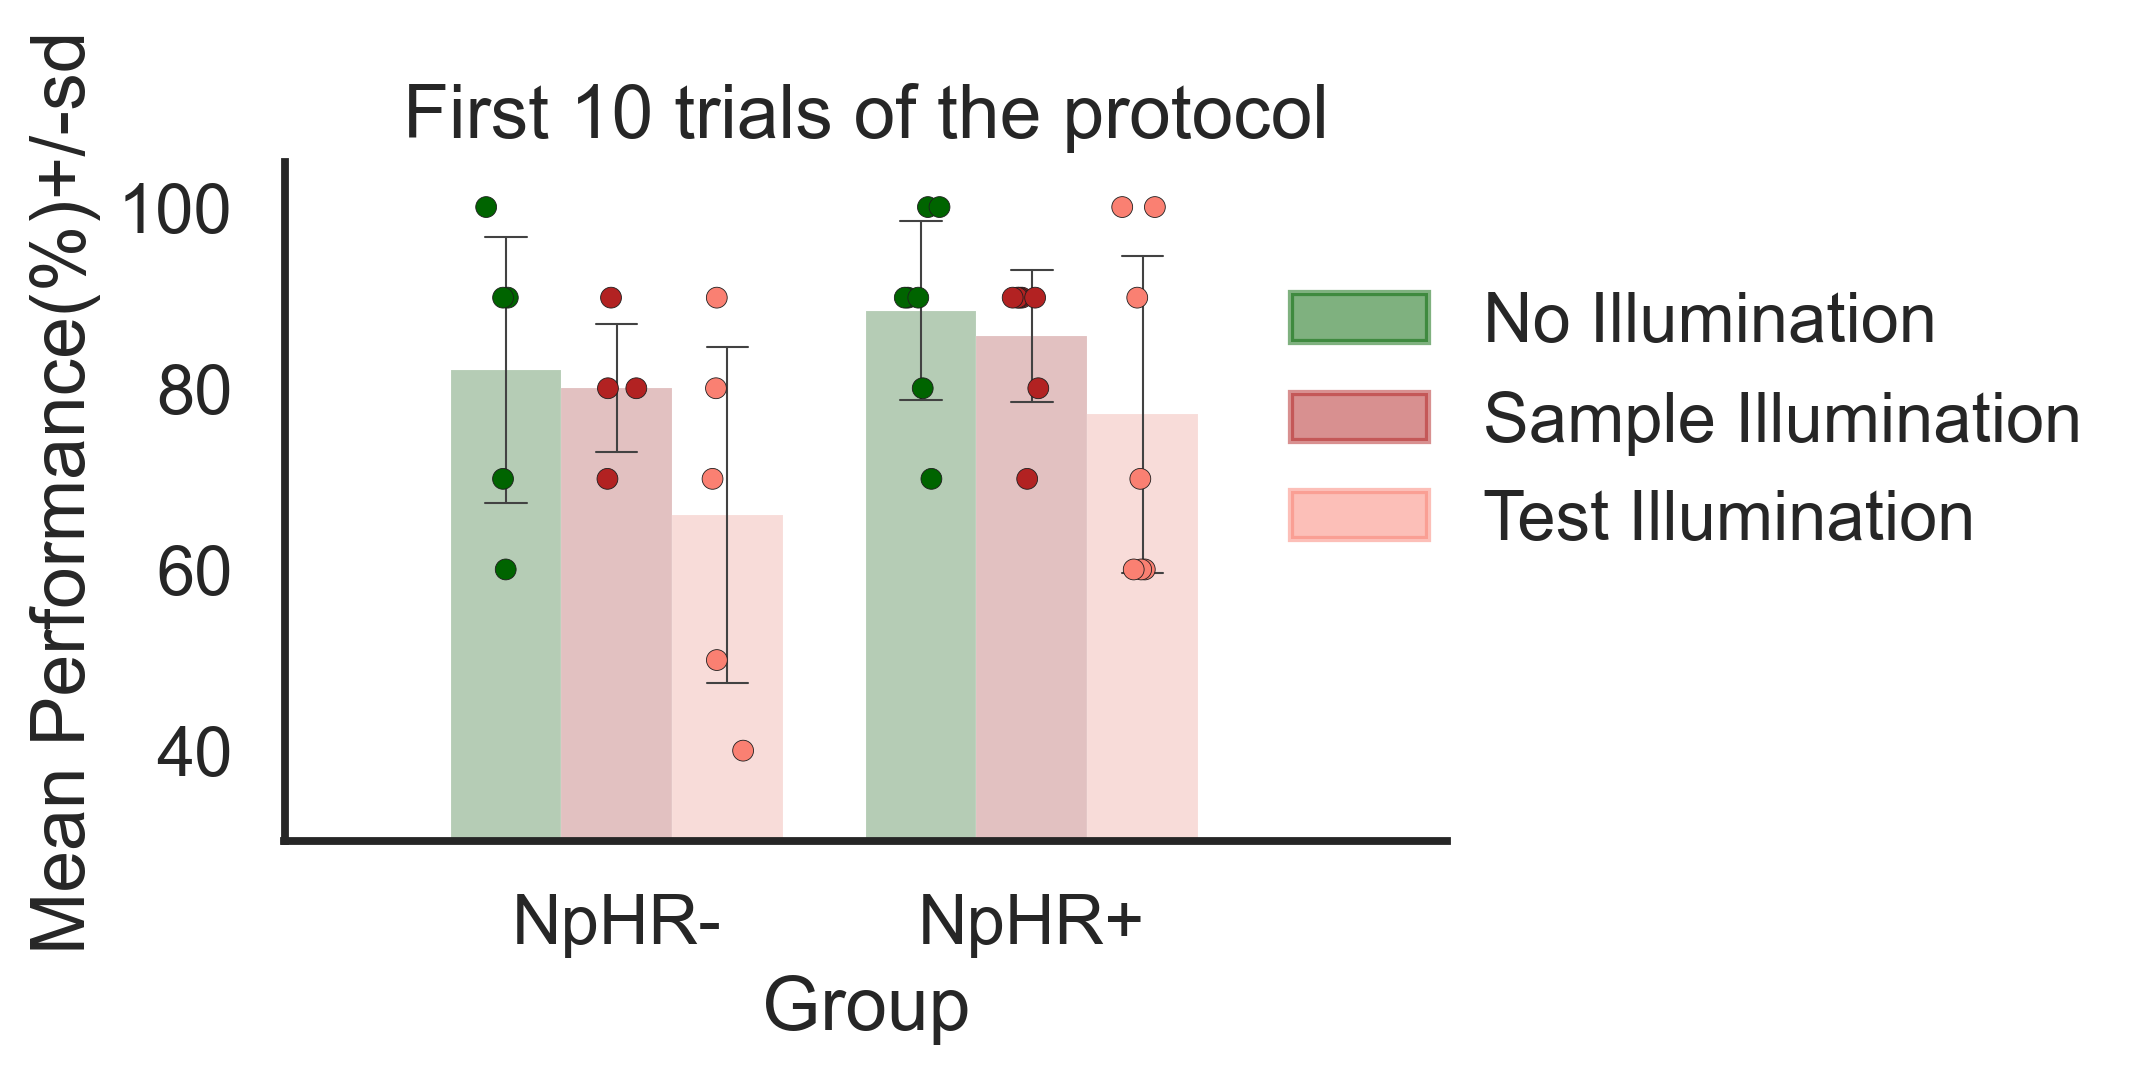

In [45]:
print(df['rat'].unique())

sns.set(style="white", context='talk')
plt.figure(figsize=(5,3), dpi=300)

g = sns.stripplot(
    data=par_perf, x='group', y='perf', hue='stim',
    jitter=.15, alpha=1, s=5, dodge=True, linewidth=.2,
    palette=['darkgreen', 'firebrick', 'salmon']
)
    
# Show means. 1st color=0, 2nd color=sample, 3rd color=test
sns.barplot(
    data=par_perf, x='group', y='perf', hue='stim', 
    alpha=.3, ci='sd', errwidth=.5, capsize=.1, linewidth=.1,
    palette=['darkgreen', 'firebrick', 'salmon']
)

g.set(
    xlim=(-.8,2), ylim=(30,105),
    ylabel=' Mean Performance(%)+/-sd', xlabel='Group',
    title='First 10 trials of the protocol'
)

g.set_xticklabels(['NpHR-', 'NpHR+'])

g.legend_.remove()
plt.legend(handles=[no_patch, sample_patch, test_patch], frameon=False, loc='upper right', bbox_to_anchor=(1.6, .9))
sns.despine()
plt.show()